In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sys 
sys.path.append("/Users/pozzolabadmin/Documents/codebase/experiments/peptide_phase_mapping")
from utils import plot_phasemap

In [2]:
ITERATION = 5

In [3]:
uvvis_data = pd.read_excel("./uvvis/itr_%d.xlsx"%ITERATION, engine='openpyxl')
# since we don't have a water sample, take it from the last run
for_water = pd.read_excel("../Aug-2024/uvvis/redisperse.xlsx", engine='openpyxl')
water = for_water.iloc[:,-1].to_numpy()
wavelength = uvvis_data["Wavelength"].to_numpy()
well_names = uvvis_data.columns[1:].to_numpy()
print(well_names)

['C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'C10' 'C11' 'C12' 'D1' 'D2'
 'D3' 'D4' 'D5' 'D6' 'D7' 'D8' 'D9' 'D10' 'D11' 'D12']


In [4]:
volumes = pd.read_csv("./opentrons/volumes_%d.csv"%ITERATION)
times = pd.read_csv("./opentrons/times_%d.csv"%ITERATION)

## Experiment 1

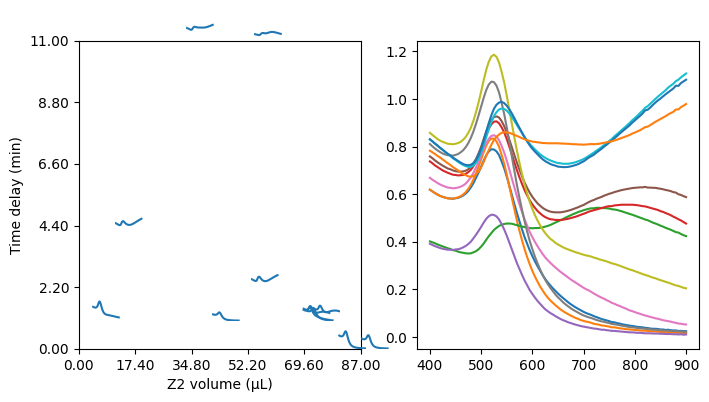

In [5]:
spectra_1 = []
for well_name in well_names[:12]:
    y = uvvis_data[well_name].values-water
    spectra_1.append(y)

spectra_1 = np.asarray(spectra_1)
bounds = np.asarray([(0.0, 87.0), (0.0,11.0)]).T
fig, axs = plt.subplots(1,2, figsize=(2*4,4))
comps = np.vstack((volumes['Z2'].values, times['DT4'].values)).T
plot_phasemap(bounds, axs[0], comps[:12,:], spectra_1, limits=[0,1.9])
axs[0].set_xlabel('Z2 volume (µL)')
axs[0].set_ylabel('Time delay (min)') 

for si in spectra_1:
    axs[1].plot(wavelength, si)
plt.show()

In [6]:
# # Remove sample A1 for training since it failed 
# new_volumes = np.delete(volumes.to_numpy()[:12,:], (0), axis=0)
# new_times = np.delete(times.to_numpy()[:12,:], (0), axis=0)
# comps_modified = np.vstack((new_volumes[:,-1], new_times[:,-1])).T
# np.save("./data/comps_11.npy", comps_modified)
# spectra_modified = np.delete(spectra, (0), axis=0)
# print(comps_modified.shape, spectra_modified.shape)

# np.save("./data/spectra_%d1.npy"%ITERATION, spectra_modified)
# np.save("./data/wav.npy", wavelength)

In [9]:
np.save("./data/spectra_%d1.npy"%ITERATION, spectra_1)
np.save("./data/wav.npy", wavelength)

## Experiment 2

In [10]:
well_names[12:]

array(['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11',
       'D12'], dtype=object)

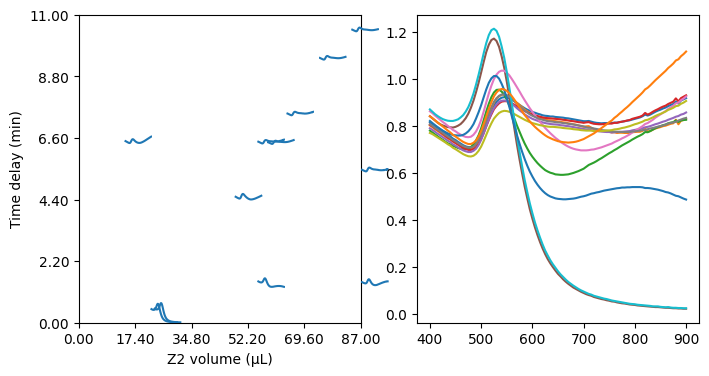

In [11]:
spectra_2 = []
for well_name in well_names[12:]:
    y = uvvis_data[well_name].values-water
    spectra_2.append(y)

spectra_2 = np.asarray(spectra_2)
bounds = np.asarray([(0.0, 87.0), (0.0,11.0)]).T
fig, axs = plt.subplots(1,2, figsize=(2*4,4))
comps = np.vstack((volumes['Z2'].values, times['DT4'].values)).T
plot_phasemap(bounds, axs[0], comps[12:,:], spectra_2, limits=[0,1.9])
axs[0].set_xlabel('Z2 volume (µL)')
axs[0].set_ylabel('Time delay (min)') 

for si in spectra_2:
    axs[1].plot(wavelength, si)
plt.show()

In [12]:
# # Remove sample B2 for training since it failed 
# new_volumes = np.delete(volumes.to_numpy()[12:,:], (1), axis=0)
# new_times = np.delete(times.to_numpy()[12:,:], (1), axis=0)
# comps_modified = np.vstack((new_volumes[:,-1], new_times[:,-1])).T
# np.save("./data/comps_12.npy", comps_modified)
# spectra_modified = np.delete(spectra, (1), axis=0)
# print(comps_modified.shape, spectra_modified.shape)

# np.save("./data/spectra_%d2.npy"%ITERATION, spectra_modified)
# np.save("./data/wav.npy", wavelength)

In [13]:
np.save("./data/spectra_%d2.npy"%ITERATION, spectra_2)
np.save("./data/wav.npy", wavelength)